X error dispersion  0.00416463090650753
Y error dispersion  0.010697514204632916
X error dispersion  0.01284373083518191
Y error dispersion  0.012841886278599675
X error dispersion  0.024859473777140755
Y error dispersion  0.02655006219395746


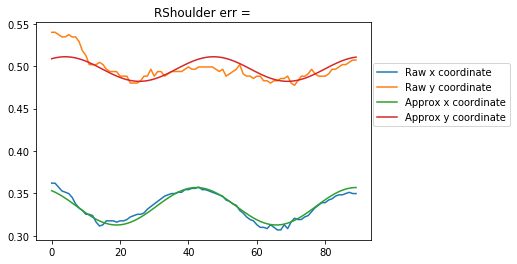

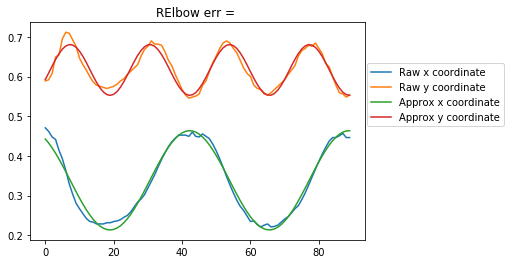

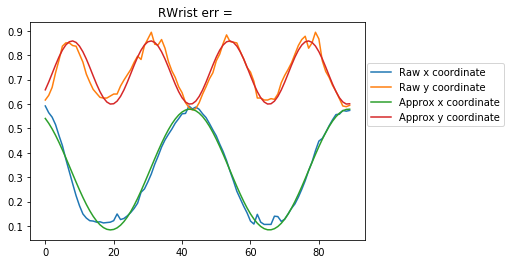

In [124]:
from os import listdir
import matplotlib.pyplot as plt
import json
from scipy import optimize
import numpy as np
import math
%matplotlib inline  

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}

def test_fun(x, a, b, c):
    return a + b*np.sin(c * x)

def plot_part(part, data):
    plt.figure()
#     plt.xlim((0,1))
#     plt.ylim((0,1))
    X = [x[part]['x'] for x in points if x[part]['x'] != None]
#     X_poly = np.polyfit(range(len(X)), X, 3)
    Y = [x[part]['y'] for x in points if x[part]['y'] != None]
#     Y_poly = np.polyfit(range(len(Y)), Y, 3)
#     X_poly = np.poly1d(X_poly)
#     Y_poly = np.poly1d(Y_poly)
    
#     X_params, X_params_cov = optimize.curve_fit(test_fun, range(len(X)), X, p0=[1,1])
#     Y_params, Y_params_cov = optimize.curve_fit(test_fun, range(len(Y)), Y, p0=[1,1])

  #  print(data)
    X_res = fit_sin(range(len(data)), [x[part]['x'] for x in data])
    Y_res = fit_sin(range(len(data)), [x[part]['y'] for x in data])
    Y_params, Y_params_cov = optimize.curve_fit(test_fun, range(len(data)), [x[part]['y'] for x in data], p0=[1,1, 1])
   # print(X_params)
    
    plt.plot(range(len(data)), X)
    plt.plot(range(len(data)), Y)
    
    
#     plt.plot(range(len(data)), [test_fun(x, X_params[0], X_params[1], X_params[2]) for x in range(len(data))])
    plt.plot(range(len(data)), [X_res['fitfunc'](x) for x in range(len(data))], label="Approx func")
    plt.plot(range(len(data)), [Y_res['fitfunc'](x) for x in range(len(data))], label='Approx func')
    
    
    X_absErr = np.std([X_res['fitfunc'](x) - X[x] for x in range(len(data))])
    Y_absErr = np.std([Y_res['fitfunc'](x) - Y[x] for x in range(len(data))])
    print("X error dispersion ",X_absErr)
    print("Y error dispersion ",Y_absErr)
    plt.title(part + ' err = ')
    plt.legend(['Raw x coordinate','Raw y coordinate', 'Approx x coordinate', 'Approx y coordinate'], loc=8,bbox_to_anchor=(1.21, 1/2))
    
def get_part(num_part, array):
    num = num_part*3
#     if (array[num + 2] < 0.5):
#         return {'x' :None, 'y':None, 'c': None}
    return {'x' :array[num]/1920, 'y': array[num + 1]/1080, 'c': array[num + 2]}

files = listdir("/home/buin/Work/output")
files = sorted(files)
points = []
for f in files:
    with open("/home/buin/Work/output/" + f) as file:
        fJson = json.load(file)
        data = fJson['people'][0]['pose_keypoints_2d']
        RShoulder = get_part(2, data)
        RElbow = get_part(3, data)
        RWrist = get_part(4, data)
        points.append({'RShoulder': RShoulder,'RElbow': RElbow,'RWrist': RWrist})
plot_part('RShoulder', points)
plot_part('RElbow', points)
plot_part('RWrist', points)

[2.90279671 1.49939077]


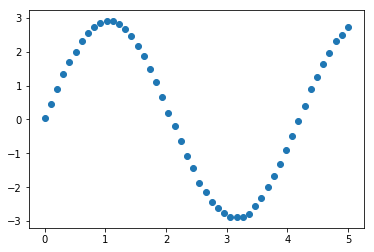

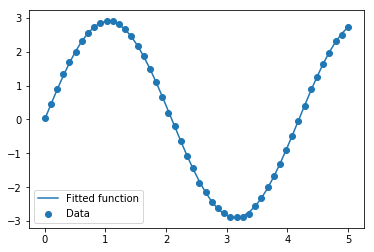

In [43]:
import numpy as np

# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(0, 5, num=50)
y_data =2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)/50

# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

print(params)
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()